In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn import datasets

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the Iris Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names

In [4]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Step 2 : Perform Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(iris_data)

## Step 3 : (Optional) Do PCA

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_decomposed = pca.fit_transform(X_scaled)

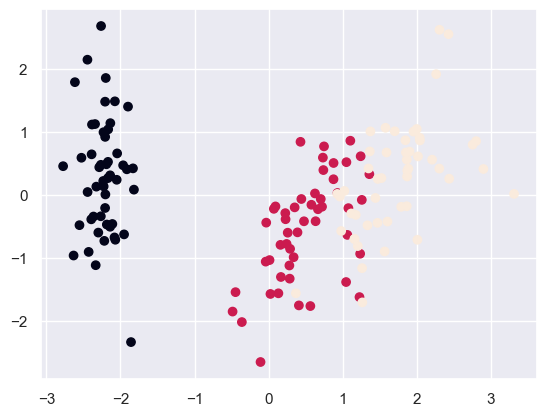

In [8]:
plt.scatter(X_decomposed[:,0], X_decomposed[:,1], c = iris.target)

## Step 4 : Visualize the dendograms to find number of clusters required

####  Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion. ‘ward’ minimizes the variance of the clusters being merged. ‘average’ uses the average of the distances of each observation of the two sets. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets. ‘single’ uses the minimum of the distances between all observations of the two sets.

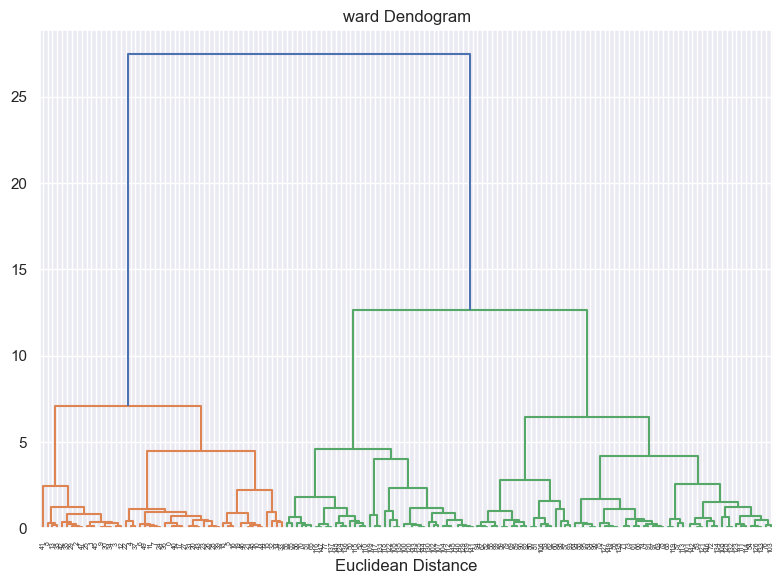

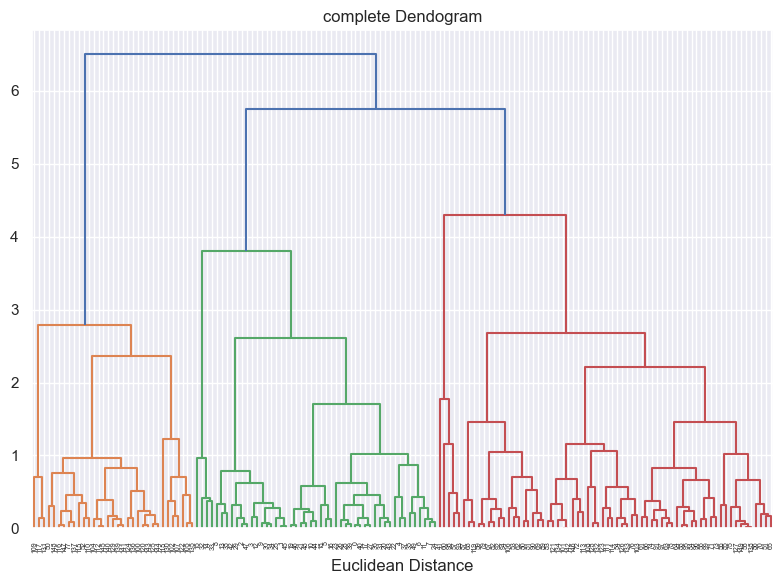

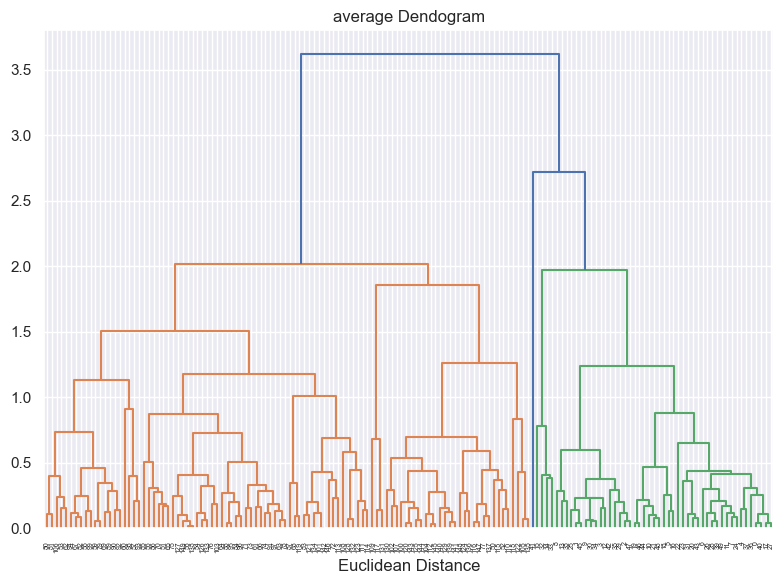

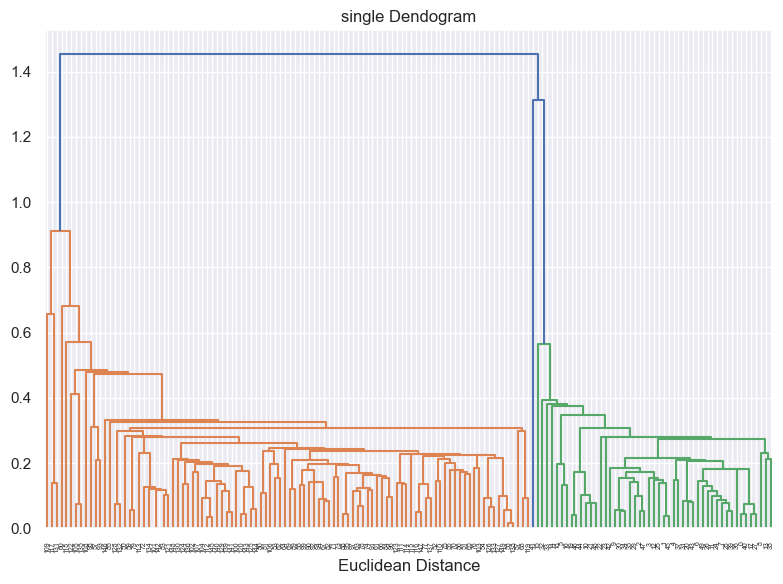

In [9]:
import scipy.cluster.hierarchy as sc
linkages = ['ward', 'complete', 'average', 'single']
for link in linkages:
    plt.figure(figsize=(8,6))
    plt.title(f"{link} Dendogram")
    sc.dendrogram(sc.linkage(X_decomposed, method=link))
    plt.xlabel("Sample")
    plt.xlabel("Euclidean Distance")
    plt.tight_layout()
    plt.show()

## Step 5 : Load the agglomerative clustering model 

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2,metric='euclidean', linkage='ward') # I AM DOING LINKAGE = WARD
labels = cluster.fit_predict(X_decomposed)

In [11]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

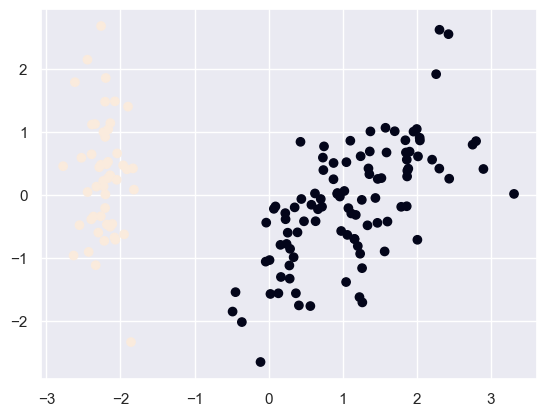

In [12]:
plt.scatter(X_decomposed[:,0], X_decomposed[:,1], c = cluster.labels_)

## Step 6 : Performance Metrics

In [13]:
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

def compute_inertia(X, labels):
    inertia = 0
    for k in np.unique(labels):
        cluster_points = X[labels == k]
        centroid = cluster_points.mean(axis=0)
        inertia += np.sum((cluster_points - centroid) ** 2)
    return inertia

def dunn_index(X, labels):
    unique_clusters = np.unique(labels)
    intra_dists = []
    inter_dists = []

    # Intra-cluster distances
    for cluster in unique_clusters:
        points = X[labels == cluster]
        if len(points) > 1:
            dist = np.max(cdist(points, points))
            intra_dists.append(dist)

    # Inter-cluster distances
    for i in range(len(unique_clusters)):
        for j in range(i + 1, len(unique_clusters)):
            c1 = X[labels == unique_clusters[i]]
            c2 = X[labels == unique_clusters[j]]
            dist = np.min(cdist(c1, c2))
            inter_dists.append(dist)

    if not intra_dists or not inter_dists:
        return np.nan  # Avoid divide-by-zero
    return np.min(inter_dists) / np.max(intra_dists)

score = silhouette_score(X_decomposed, labels)
print(f"Silhouette Score: {score}")
inertia = compute_inertia(X_decomposed, labels)
print(f"Inertia: {inertia}")
dunn = dunn_index(X_decomposed, labels)
print(f"Dunn Index: {dunn}")

Silhouette Score: 0.6145202036230452
Inertia: 197.40381604541264
Dunn Index: 0.25042024318850825


#### Silhouette Score : A score above 0.5 is generally considered good.
#### Inertia : Lower is better — indicates tightness within clusters. On its own, inertia doesn’t say much unless compared across models (e.g., for different n_clusters).
#### Dunn Index : Dunn Index ranges from 0 to ∞, where higher is better.